# 2.5 multi-dimensional Gaussian distribution

## 2.5.1 2D Gaussian

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../sensor_data/sensor_data_700.txt", delimiter=" ", names=["date","time","ir","lidar"])

In [4]:
d = data[(data['time']>=120000) & (data['time']<160000)] # extract 12 to 16 oclock.
d

,date,time,ir,lidar
3832,20180205,120000,17,726
3833,20180205,120003,14,730
3834,20180205,120006,14,724
3835,20180205,120010,21,724
3836,20180205,120013,26,725
...,...,...,...,...
65155,20180207,155946,8,729
65156,20180207,155949,25,730
65157,20180207,155952,10,731
65158,20180207,155955,15,735


In [5]:
d = d.loc[:,["ir","lidar"]] # extract only ir and lidar data
d

,ir,lidar
3832,17,726
3833,14,730
3834,14,724
3835,21,724
3836,26,725
...,...,...
65155,8,729
65156,25,730
65157,10,731
65158,15,735


In [7]:
import seaborn as sns

/home/masahiro/software/anaconda3/envs/study/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


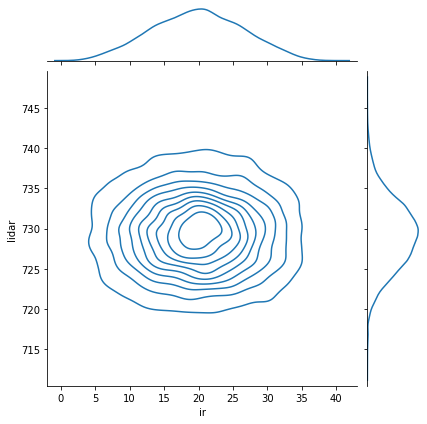

In [8]:
sns.jointplot(d['ir'], d['lidar'], d, kind='kde')

In [9]:
d.ir.var()

42.117126367701594

In [10]:
d.lidar.var()

17.702026469211457

In [11]:
d.mean()

ir        19.860247
lidar    729.311958
dtype: float64

In [12]:
sum((d.ir - d.ir.mean()) * (d.lidar - d.lidar.mean())) / (len(d) - 1)

-0.31677803385436953

In [13]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [20]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

In [21]:
irlidar = multivariate_normal(mean=d.mean().values, cov = d.cov().values)

<a list of 6 text.Text objects>

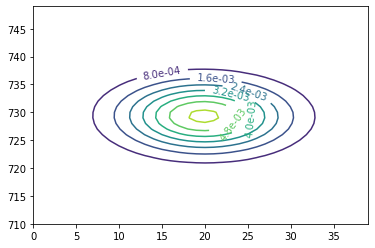

In [22]:
x,y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y
cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

In [23]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [37, 37, 37, ..., 37, 37, 37],
       [38, 38, 38, ..., 38, 38, 38],
       [39, 39, 39, ..., 39, 39, 39]])

## 2.5.2 meaning of covariance

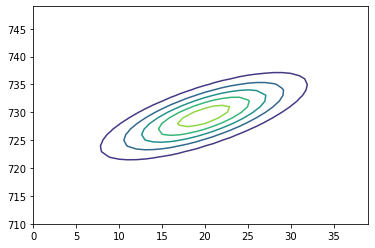

In [26]:
c = d.cov().values + np.array([[0,20],[20,0]])
tmp = multivariate_normal(mean=d.mean(), cov=c)
cont = plt.contour(x,y,tmp.pdf(pos))

In [28]:
data = pd.read_csv("../sensor_data/sensor_data_200.txt", delimiter=' ', names = ['date','time','ir','lidar'])

In [29]:
d=data.loc[:,['ir','lidar']]

/home/masahiro/software/anaconda3/envs/study/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


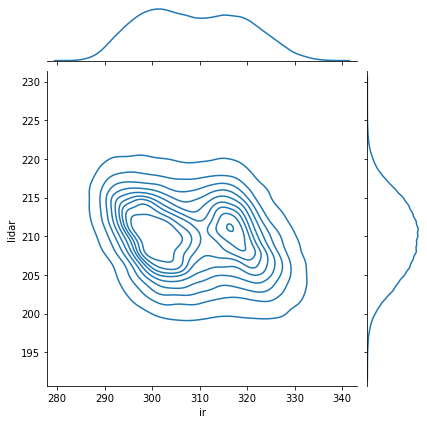

In [30]:
sns.jointplot(d['ir'], d['lidar'], d, kind='kde')

In [31]:
d.cov()

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


In [32]:
irlidar = multivariate_normal(mean=d.mean(), cov=d.cov())

<a list of 5 text.Text objects>

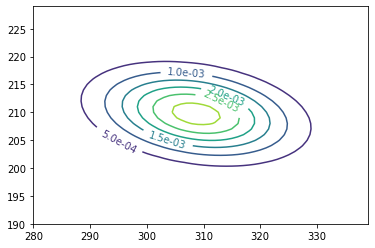

In [35]:
x,y = np.mgrid[280:340, 190:230]
pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y
cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

## 2.5.3 covanriance and error elipse